# $G(n_A,n_B)$ and $G(\epsilon)$

### Neshyba, 2021

## Introduction

### $G(n_A,n_B)$
Our first task here is to visualize the Gibbs energy thermodynamic surface in the state space $n_A, n_B$. Figure 1 displays how this state space could be replicated experimentally, by mixing up different volumes of stock solutions of $A$ and $B$.

<p style='text-align: center;'>
<img src="GnAnB.png" height="700" width="700"/>

__Figure 1__. Left: Schematic of how the state space $n_A, n_B$ could be realized in practice. Right: Equations used to compute the Gibbs energy in this space.  
</p>

Figure 1 also displays key equations that reflect the underlying ideas, e.g., that the Gibbs energy is determined by the Gibbs energy of the *unmixed* stock solutions (indicated by $G^o$ in the figure) plus a term that describes the change in Gibbs energy that results when one mixes those stock solutions ($\Delta G_{mix}$). The latter term depends on *mole fractions* of $A$ and $B$ in these reaction mixtures, defined by

$$
\chi_A = \frac {n_A}{n_{tot}} \ \ \ \ (1)
$$

and 

$$
\chi_B = \frac {n_B}{n_{tot}} \ \ \ \ (2)
$$

where 

$$
n_{tot} = n_A+n_B \ \ \ \ (3)
$$

### $G(\epsilon)$
How exactly does this relate to a reaction mixture? If a reaction proceeds according to the stoichiometry $A → B$, then we can describe the progress of that reaction with a parameter $\epsilon$, which ranges from zero to one, and therefore 

$$
n_A = 1 - \epsilon \ \ \ \ (4)
$$

$$
n_B = \epsilon \ \ \ \ (5)
$$

In Fig. 1, this *reaction path* would correspond to proceeding from the lower-right square (where $\epsilon = 0$, $n_A=1$, and $n_B=0$) diagonally up to the upper-left square (where $\epsilon = 1$, $n_A=0$, and $n_B=1$). If you want to focus on what the Gibbs energy looks like along that path, you would be looking at something like what is shown in Fig. 2.

<p style='text-align: center;'>
<img src="GibbsSurface.png" height="500" width="500"/>

__Figure 2__. Gibbs surface showing the Gibbs energy along a reaction path, $G(\epsilon)$.
</p>



## Learning Goals
- Gain familiarity with the appearance of the Gibbs energy in a $n_A,n_B$ state space, $G(n_A,n_B)$.
- Gain familiarity with the appearance of the Gibbs energy along a reaction path, $G(\epsilon)$.

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
import sympy as sp
%matplotlib notebook

In [2]:
# This lays out the state space
start = 0.001
stop = 0.999
nA, nB = PL.Statespace([start,stop,50],[start,stop,51])
nA = AssignQuantity(nA,'mole')
nB = AssignQuantity(nB,'mole')

# x- and y-labels
xlabel = str(nA.units)+'s of A'
ylabel = str(nB.units)+'s of B'

# Specify some constants
c0 = AssignQuantity(1,'mol/L')
c0.ito('mol/m^3')
R = AssignQuantity(8.314,'J/mol/K')
G0A = AssignQuantity(3000,'J/mol')
G0B = AssignQuantity(1000,'J/mol')
T = AssignQuantity(298,'K')

Text(0.5, 0.92, 'Total volume')

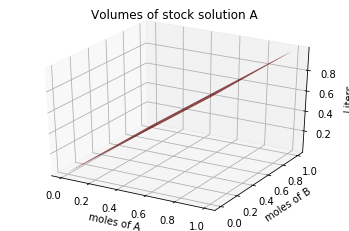

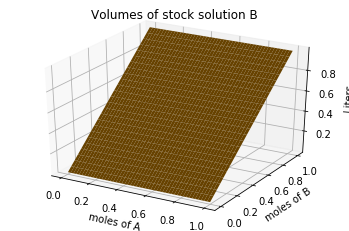

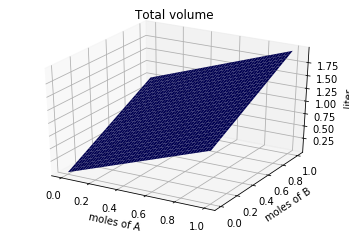

In [3]:
# Get volumes of stock solution A (VA = nA/c0), and plot it
VA = nA/c0
ax = PL.plot_surface(nA, nB, VA.to('L'), color='red')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel('Liters')
ax.set_title('Volumes of stock solution A')

# Do the same for B
### BEGIN SOLUTION
VB = nB/c0
ax = PL.plot_surface(nA, nB, VB.to('L'), color='orange')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel('Liters')
ax.set_title('Volumes of stock solution B')
### END SOLUTION

# While we're at it, get the total volume (VA+VB) after combining the stock solutions (and plot it too)
### BEGIN SOLUTION
Vtot = VA+VB
ax = PL.plot_surface(nA, nB, Vtot.to('L'), color='blue')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(Vtot.to('L').units))
ax.set_title('Total volume')
### END SOLUTION

Text(0.5, 0.92, 'Total Gibbs energy of unmixed reagents')

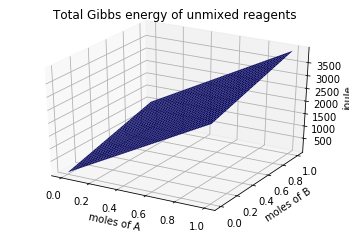

In [4]:
# Get G0 = G0A*nA + G0B*nB and plot it
# (See Fig. 1)
### BEGIN SOLUTION
G0 = G0A*nA + G0B*nB
ax = PL.plot_surface(nA, nB, G0, color='blue')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(G0.units))
ax.set_title('Total Gibbs energy of unmixed reagents')
### END SOLUTION

In [5]:
# Get total moles and mole fractions when stock solutions are mixed (See Eqs. (1)-(3))
### BEGIN SOLUTION
ntot = nA + nB
chiA = nA/ntot
chiB = nB/ntot
### END SOLUTION

# Get Gibbs energy of mixing (see equations in Fig. 1) -- call it DeltaGmix
### BEGIN SOLUTION
DeltaGmix = ntot*R*T*(chiA*np.log(chiA)+chiB*np.log(chiB))
### END SOLUTION

# Get the total Gibbs energy (see equations in Fig. 1) -- call it G
### BEGIN SOLUTION
G = G0 + DeltaGmix

# The rest of this box is not part of the assignment, it's just playing around with chemical potentials
Iwantchemicalpot = False
if Iwantchemicalpot:
    # Numerical chemical potentials
    nAx, nBx, muA_num = PL.dF_dx([nA,nB],G)
    nAy, nBy, muB_num = PL.dF_dy([nA,nB],G)

    # Analytical chemical potentials
    cA = nA/Vtot
    muA = G0A + R*T*np.log(cA/c0)
    cB = nB/Vtot
    muB = G0B + R*T*np.log(cB/c0)
    ax = PL.plot_surface(nAx, nBx, muA_num, color='pink')
    ax = PL.plot_surface(nA, nB, muA, color='black')
    ax.set_xlabel("nA")
    ax.set_ylabel("nB")
    ax.set_title('mu_A')

    ax = PL.plot_surface(nAy, nBy, muB_num, color='orange')
    ax = PL.plot_surface(nA, nB, muB, color='black')
    ax.set_xlabel("nA")
    ax.set_ylabel("nB")
    ax.set_title('mu_B')

### END SOLUTION

Text(0.5, 0.92, 'Total Gibbs energy (before and after mixing)')

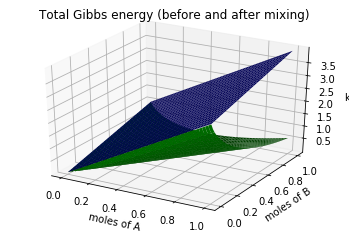

In [6]:
# This plots G along with G0
ax = PL.plot_surface(nA, nB, G0.to('kJ'), color='blue')
ax = PL.plot_surface(nA, nB, G.to('kJ'), color='green', overlay=True, ax=ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel('kJ')
ax.set_title('Total Gibbs energy (before and after mixing)')

In [9]:
# Lay out the reaction coordinate "eps", and arrays of nA and nB (nAarray and nBarray) that go with it
# (See Eqs (4) & (5))
# Call your variables eps, nArray, and nBarray
### BEGIN SOLUTION
eps = np.linspace(start,stop)
nAarray = AssignQuantity(1-eps,'mol')
nBarray = AssignQuantity(eps,'mol')
### END SOLUTION

Text(0, 0.5, 'kjoule')

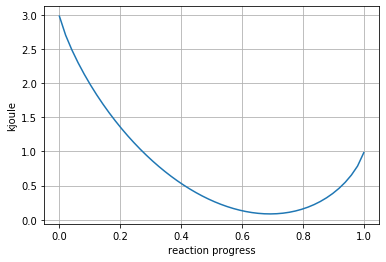

In [10]:
# This plots the Gibbs energy along this path
Garray = PL.StateSpaceInterpolator([nA,nB],nAarray,nBarray,G,AssignQuantity)
plt.figure()
plt.plot(eps,Garray.to('kjoule'))
plt.grid(True)
plt.xlabel('reaction progress')
plt.ylabel('kjoule')